# Análise sobre Contratos
---

### 1. Colunas Adicionais

1. Adicionar coluna que identifica se o contrato foi expirado (data_fim < data_atual)
2. Adicionar coluna de período de contrato

#### 1.1 Tempo médio de contrato por categoria
Objetivo: entender a duração média dos contratos com base na sua categoria (mensal, anual, trimestral, semestral e bianual)

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Conectar ao banco de dados SQLite
conn = sqlite3.connect(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\seguros.db')

df_dict = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_dicionario_dados.csv', encoding='utf-8', sep=',')
df_cancel = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_cancelamentos.csv', encoding='utf-8', sep=',')
df_contratos = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_contratos.csv', encoding='utf-8', sep=',')
df_clientes= pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_clientes.csv', encoding='utf-8', sep=',')
df_clientes.to_sql('clientes', conn, if_exists='replace', index=False)
df_contratos.to_sql('contratos', conn, if_exists='replace', index=False)
df_cancel.to_sql('cancelamentos', conn, if_exists='replace', index=False)

# Carregar as tabelas como DataFrames do pandas
df_clientes = pd.read_sql_query("SELECT * FROM clientes", conn)
df_contratos = pd.read_sql_query("SELECT * FROM contratos", conn)
df_cancel = pd.read_sql_query("SELECT * FROM cancelamentos", conn)

1.1.1 Entendendo quantos contratos temos nas três modalidades de duração de contrato.


,genero,idade,renda_mensal,nivel_educacional,qtd_dependentes,tipo_seguro,valor_premio_mensal,satisfacao_ultima_avaliacao,canal_venda,renovado_automaticamente,duracao_dias,tipo_duracao,cancelado
0,Outro,66,12406.88,Técnico,2,Empresarial,892.30,Média,Site,0,180.0,Semestral,1
1,Outro,67,18950.78,Superior,3,Vida,962.07,Baixa,Agência Física,0,730.0,Bianual,0
2,Outro,39,19063.54,Técnico,0,Vida,511.69,Baixa,App,0,180.0,Semestral,0
3,Feminino,79,13716.90,Superior,1,Residencial,417.14,Baixa,Corretor,0,365.0,Anual,0
4,Feminino,46,17135.37,Técnico,3,Vida,996.09,Baixa,App,1,180.0,Semestral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Masculino,57,3167.47,Superior,1,Residencial,334.17,Baixa,Agência Física,0,180.0,Semestral,1
11996,Outro,45,1655.74,Médio,1,Vida,897.26,Alta,Site,0,730.0,Bianual,0
11997,Outro,45,16652.42,Médio,0,Vida,1478.74,Alta,Agência Física,0,730.0,Bianual,1
11998,Masculino,42,4596.17,Superior,1,Vida,1026.34,Alta,App,1,180.0,Semestral,0


Gráfico

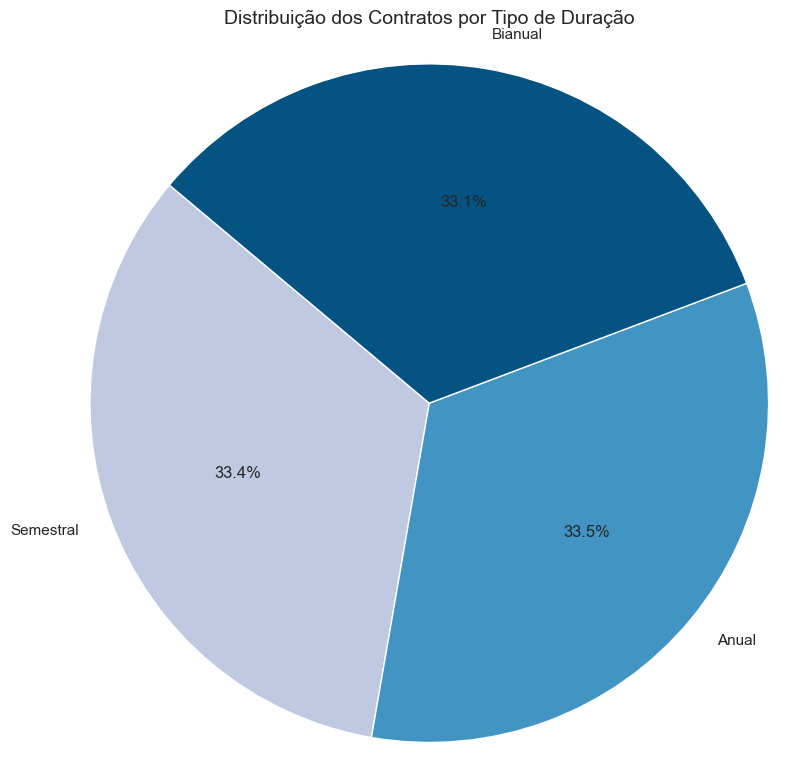

In [46]:
import matplotlib.pyplot as plt

# Dados
labels = df_contrato_agroup_categ["tipo_duracao"]
sizes = df_contrato_agroup_categ["total_contratos"]

# Cores (opcional)
colors = plt.cm.PuBu(np.linspace(0.3, 0.9, len(labels)))

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribuição dos Contratos por Tipo de Duração", fontsize=14)
plt.axis('equal')  # Deixa o gráfico como um círculo
plt.tight_layout()
plt.show()


1.1.2 Entendendo quantos contratos e a média de contratos cancelados nos seguintes períodos: mensal, trimestral, semestral, anual e bianual.


In [8]:
query_contrato_cancelado_agroup_categ = """
WITH contratos_cancelados AS (
  SELECT 
    c.id_contrato,
    DATE(c.data_inicio) AS inicio,
    DATE(ca.data_cancelamento) AS cancelamento,
    julianday(ca.data_cancelamento) - julianday(c.data_inicio) AS duracao_dias,
    CASE 
      WHEN julianday(ca.data_cancelamento) - julianday(c.data_inicio) <= 31 THEN 'Mensal'
      WHEN julianday(ca.data_cancelamento) - julianday(c.data_inicio) BETWEEN 32 AND 92 THEN 'Trimestral'
      WHEN julianday(ca.data_cancelamento) - julianday(c.data_inicio) BETWEEN 93 AND 183 THEN 'Semestral'
      WHEN julianday(ca.data_cancelamento) - julianday(c.data_inicio) BETWEEN 184 AND 366 THEN 'Anual'
      WHEN julianday(ca.data_cancelamento) - julianday(c.data_inicio) > 366 THEN 'Bianual'
      ELSE 'Indefinido'
    END AS tipo_duracao
  FROM contratos c
  JOIN cancelamentos ca ON c.id_contrato = ca.id_contrato
)

SELECT 
  tipo_duracao,
  COUNT(*) AS total_cancelados,
  ROUND(AVG(duracao_dias), 2) AS media_dias_cancelamento
FROM contratos_cancelados
GROUP BY tipo_duracao
ORDER BY media_dias_cancelamento;

"""
df_contrato_cancelado_agroup_categ = pd.read_sql_query(query_contrato_cancelado_agroup_categ, conn)
df_contrato_cancelado_agroup_categ

,tipo_duracao,total_cancelados,media_dias_cancelamento
0,Mensal,12,30.42
1,Trimestral,213,60.76
2,Semestral,1027,166.30
3,Anual,842,316.96
4,Bianual,426,550.06


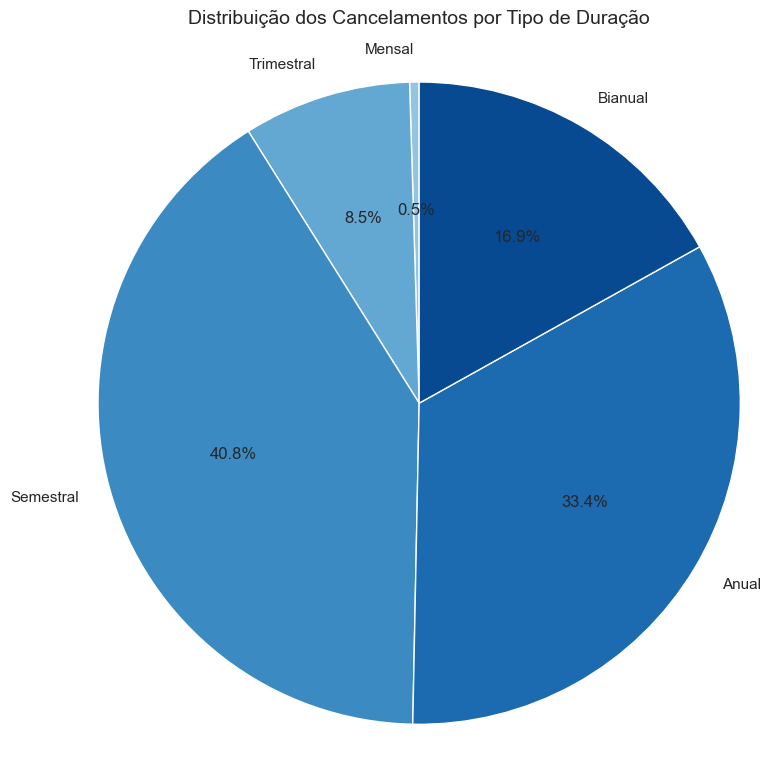

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
labels = df_contrato_cancelado_agroup_categ["tipo_duracao"]
sizes = df_contrato_cancelado_agroup_categ["total_cancelados"]

# Cores
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(labels)))

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribuição dos Cancelamentos por Tipo de Duração", fontsize=14)
plt.axis('equal')  # Círculo
plt.tight_layout()
plt.show()

1.1.3 Entendendo a duração média dos contratos até o cancelamento pelos tipos de durações originais do contrato, sendo: semestral, anual e bianual.

In [12]:
query_contrato_agroup_categ_cancel = """ 
WITH contratos_cancelados AS (
  SELECT 
    c.id_contrato,
    DATE(c.data_inicio) AS inicio,
    DATE(c.data_fim) AS fim,
    DATE(ca.data_cancelamento) AS cancelamento,
    
    -- Duração até o cancelamento
    julianday(ca.data_cancelamento) - julianday(c.data_inicio) AS duracao_ate_cancelamento,
    
    -- Duração total do contrato original
    julianday(c.data_fim) - julianday(c.data_inicio) AS duracao_total_contrato,
    
    -- Classificação baseada na duração total original
    CASE 
      WHEN julianday(c.data_fim) - julianday(c.data_inicio) <= 31 THEN 'Mensal'
      WHEN julianday(c.data_fim) - julianday(c.data_inicio) BETWEEN 32 AND 92 THEN 'Trimestral'
      WHEN julianday(c.data_fim) - julianday(c.data_inicio) BETWEEN 93 AND 183 THEN 'Semestral'
      WHEN julianday(c.data_fim) - julianday(c.data_inicio) BETWEEN 184 AND 366 THEN 'Anual'
      WHEN julianday(c.data_fim) - julianday(c.data_inicio) > 366 THEN 'Bianual'
      ELSE 'Indefinido'
    END AS tipo_duracao_original
  FROM contratos c
  JOIN cancelamentos ca ON c.id_contrato = ca.id_contrato
)

SELECT 
  tipo_duracao_original,
  COUNT(*) AS total_cancelados,
  ROUND(AVG(duracao_ate_cancelamento), 2) AS media_dias_ate_cancelar,
  ROUND(AVG(duracao_total_contrato), 2) AS media_dias_contrato_original
FROM contratos_cancelados
GROUP BY tipo_duracao_original
ORDER BY tipo_duracao_original;
"""
df__contrato_agroup_categ_cancel = pd.read_sql_query(query_contrato_agroup_categ_cancel, conn)
df__contrato_agroup_categ_cancel

,tipo_duracao_original,total_cancelados,media_dias_ate_cancelar,media_dias_contrato_original
0,Anual,826,280.58,365.0
1,Bianual,802,383.64,730.0
2,Semestral,892,163.52,180.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26600\2550708522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


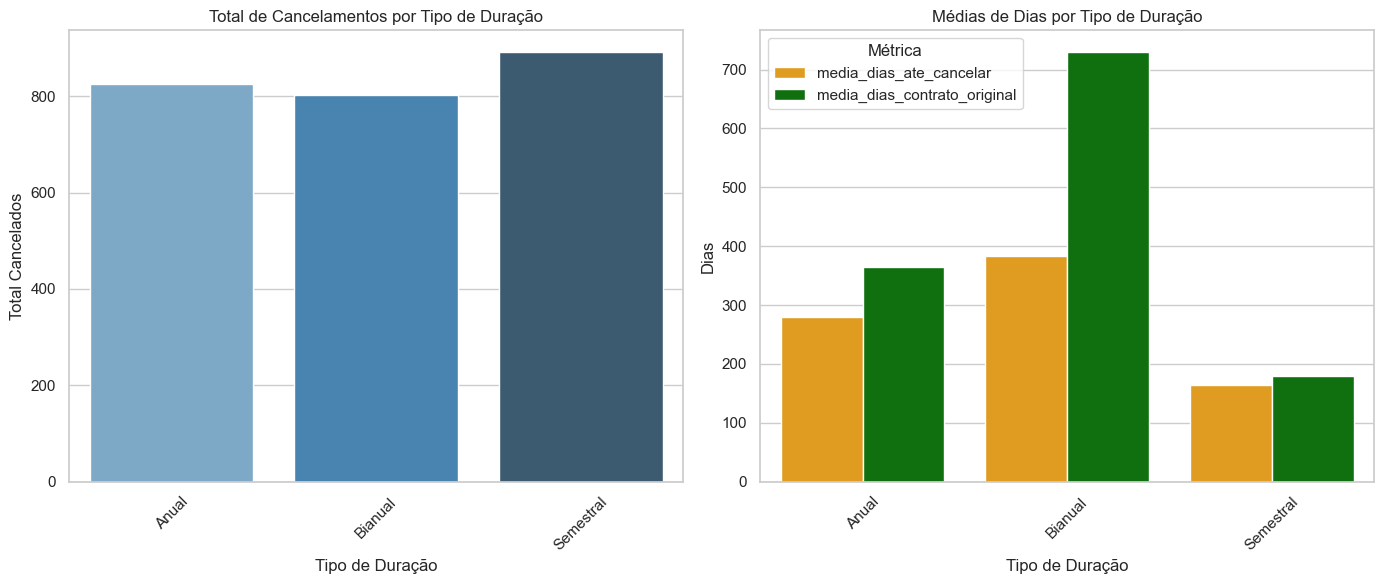

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df__contrato_agroup_categ_cancel.sort_values("tipo_duracao_original")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Total cancelados
sns.barplot(
    x='tipo_duracao_original',
    y='total_cancelados',
    data=df,
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('Total de Cancelamentos por Tipo de Duração')
axes[0].set_xlabel('Tipo de Duração')
axes[0].set_ylabel('Total Cancelados')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Médias de dias
df_melted = df.melt(id_vars='tipo_duracao_original', 
                    value_vars=['media_dias_ate_cancelar', 'media_dias_contrato_original'],
                    var_name='Métrica', value_name='Dias')

sns.barplot(
    x='tipo_duracao_original',
    y='Dias',
    hue='Métrica',
    data=df_melted,
    ax=axes[1],
    palette=['orange', 'green']
)
axes[1].set_title('Médias de Dias por Tipo de Duração')
axes[1].set_xlabel('Tipo de Duração')
axes[1].set_ylabel('Dias')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Métrica')

plt.tight_layout()
plt.show()


1.3 Houve troca de plano antes do cancelamento?


In [18]:
query_troca_plano_antes_cancel = """ 
SELECT 
  c2.tipo_seguro AS novo_tipo_seguro,
  COUNT(*) AS total_contratos_apos_cancelamento
FROM contratos c1
JOIN cancelamentos ca 
  ON c1.id_contrato = ca.id_contrato
JOIN contratos c2 
  ON c1.id_cliente = c2.id_cliente
  AND DATE(c2.data_inicio) > DATE(ca.data_cancelamento)
GROUP BY c2.tipo_seguro
ORDER BY total_contratos_apos_cancelamento DESC;
"""
df_troca_plano_antes_cancel = pd.read_sql_query(query_troca_plano_antes_cancel, conn)
df_troca_plano_antes_cancel

,novo_tipo_seguro,total_contratos_apos_cancelamento
0,Vida,400
1,Residencial,366
2,Empresarial,346
3,Auto,342
4,Saúde,324


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26600\3790904245.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


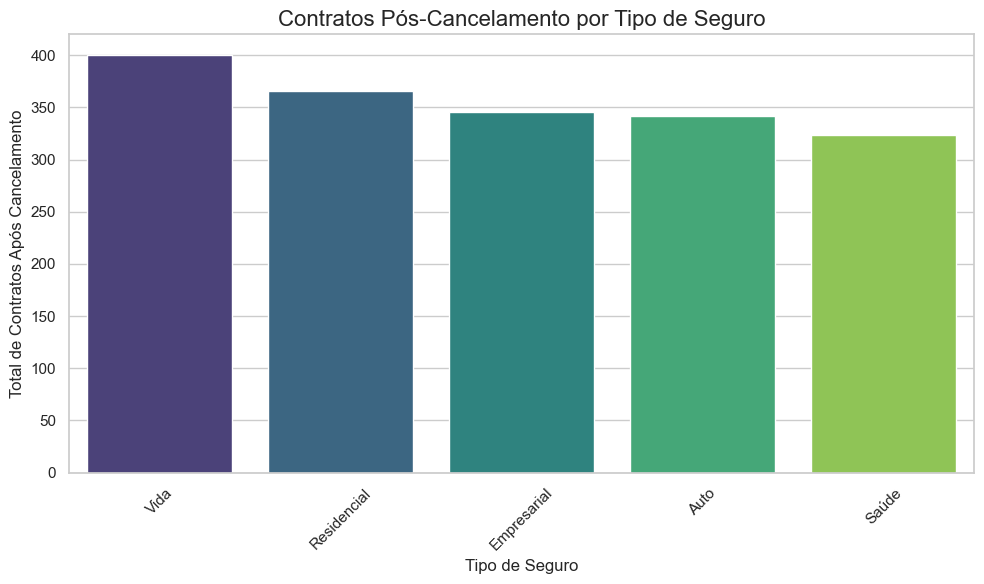

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_troca_plano_antes_cancel,
    x='novo_tipo_seguro',
    y='total_contratos_apos_cancelamento',
    palette='viridis'
)

plt.title('Contratos Pós-Cancelamento por Tipo de Seguro', fontsize=16)
plt.xlabel('Tipo de Seguro')
plt.ylabel('Total de Contratos Após Cancelamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1.3.1 Entendendo o total de clientes que trocaram de plano após cancelamentos


In [24]:
query_total_contratos_pos_cancel = """ 
SELECT 
  COUNT(DISTINCT c1.id_cliente) AS total_trocas_apos_cancelamento
FROM contratos c1
JOIN cancelamentos ca ON c1.id_contrato = ca.id_contrato
JOIN contratos c2 
  ON c1.id_cliente = c2.id_cliente
  AND DATE(c2.data_inicio) > DATE(ca.data_cancelamento);
"""
df_total_contratos_pos_cancel = pd.read_sql(query_total_contratos_pos_cancel, conn)
df_total_contratos_pos_cancel

,total_trocas_apos_cancelamento
0,919


1.3.2 Entendendo por qual tipo de plano após cancelado, foi trocado.

In [20]:
query_plano_ant_pos = """
SELECT 
  c1.tipo_seguro AS tipo_seguro_cancelado,
  c2.tipo_seguro AS novo_tipo_seguro,
  COUNT(*) AS total_trocas
FROM contratos c1
JOIN cancelamentos ca 
  ON c1.id_contrato = ca.id_contrato
JOIN contratos c2 
  ON c1.id_cliente = c2.id_cliente
  AND c1.id_contrato != c2.id_contrato
WHERE DATE(c2.data_inicio) > DATE(ca.data_cancelamento)
GROUP BY tipo_seguro_cancelado, novo_tipo_seguro
ORDER BY total_trocas DESC;
"""
df_plano_ant_pos = pd.read_sql_query(query_plano_ant_pos, conn)
df_plano_ant_pos

,tipo_seguro_cancelado,novo_tipo_seguro,total_trocas
0,Residencial,Vida,97
1,Residencial,Empresarial,92
2,Empresarial,Saúde,84
3,Empresarial,Residencial,83
4,Empresarial,Vida,83
5,Auto,Vida,82
6,Auto,Residencial,81
7,Residencial,Auto,80
8,Saúde,Auto,78
9,Vida,Vida,75


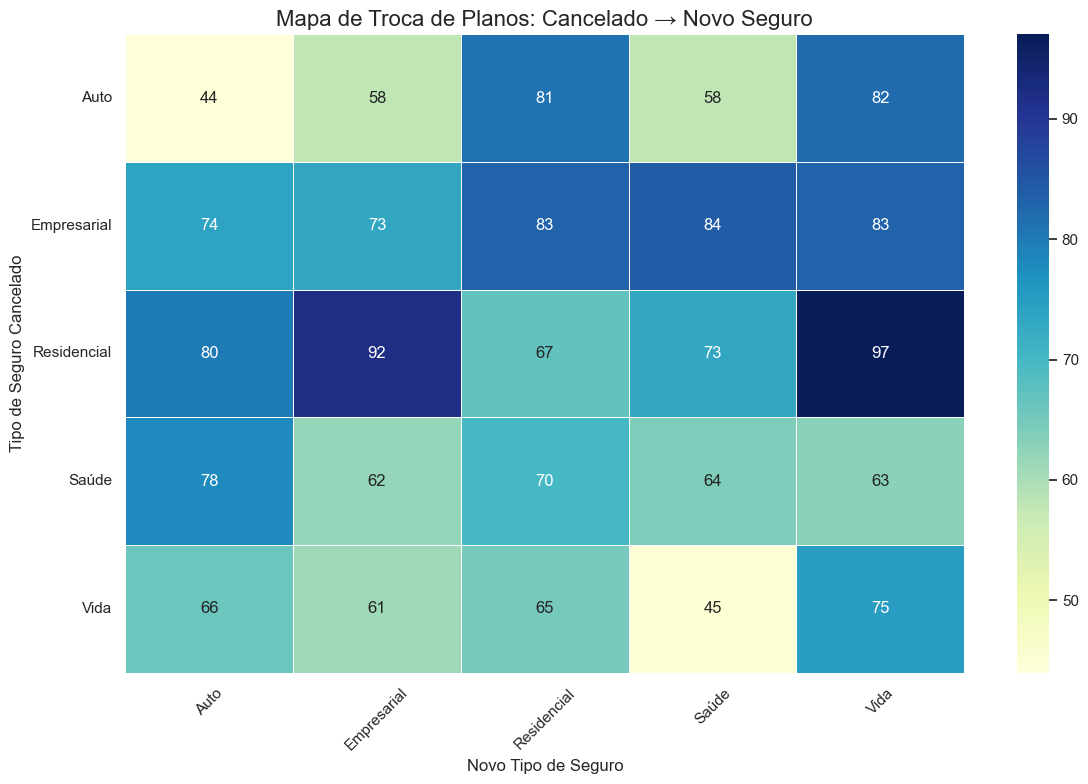

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pivotar os dados para formato matriz
pivot_df = df_plano_ant_pos.pivot(index='tipo_seguro_cancelado', columns='novo_tipo_seguro', values='total_trocas').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Mapa de Troca de Planos: Cancelado → Novo Seguro", fontsize=16)
plt.xlabel("Novo Tipo de Seguro")
plt.ylabel("Tipo de Seguro Cancelado")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


1.3.4 Entendendo quantos clientes cancelaram pra ter um novo contrato e quantos cancelaram para finalizar relacionamento.

In [26]:
query_clientes_renovados_perdidos = """ 
WITH cancelamentos_clientes AS (
  SELECT 
    c1.id_cliente,
    ca.data_cancelamento
  FROM contratos c1
  JOIN cancelamentos ca ON c1.id_contrato = ca.id_contrato
),

clientes_com_novo_contrato AS (
  SELECT DISTINCT c1.id_cliente
  FROM cancelamentos_clientes c1
  JOIN contratos c2 
    ON c1.id_cliente = c2.id_cliente
   AND DATE(c2.data_inicio) > DATE(c1.data_cancelamento)
)

-- Contar quantos voltaram e quantos não voltaram
SELECT 
  CASE 
    WHEN c1.id_cliente IN (SELECT id_cliente FROM clientes_com_novo_contrato) THEN 'Cancelou e voltou'
    ELSE 'Cancelou e não voltou'
  END AS status_cliente,
  COUNT(DISTINCT c1.id_cliente) AS total_clientes
FROM cancelamentos_clientes c1
GROUP BY status_cliente;
"""
df_clientes_renovados_perdidos = pd.read_sql_query(query_clientes_renovados_perdidos, conn)
df_clientes_renovados_perdidos

,status_cliente,total_clientes
0,Cancelou e não voltou,1054
1,Cancelou e voltou,919


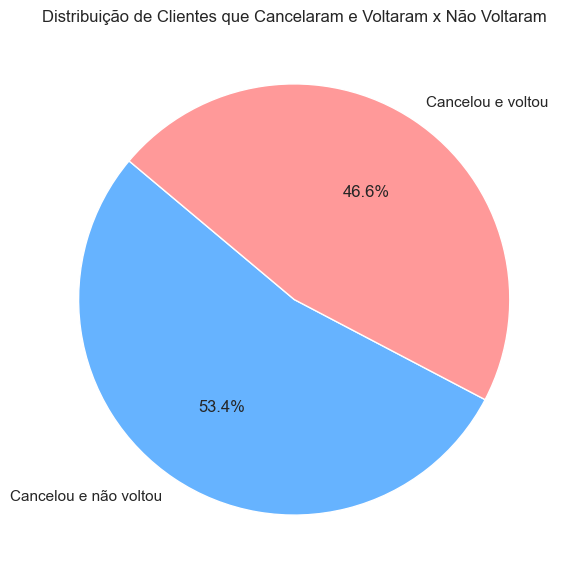

In [53]:
import matplotlib.pyplot as plt

# Dados
labels = df_clientes_renovados_perdidos['status_cliente']
sizes = df_clientes_renovados_perdidos['total_clientes']

# Plot
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribuição de Clientes que Cancelaram e Voltaram x Não Voltaram')
plt.show()


1.3.5 Vendo a porcentagem dos clientes que renovaram e quantos cancelaram


In [28]:
query_renovou_volta_mais = """ 
-- 1. Identificar clientes com múltiplos contratos
WITH contratos_ordenados AS (
  SELECT 
    id_cliente,
    id_contrato,
    DATE(data_inicio) AS data_inicio,
    DATE(data_fim) AS data_fim
  FROM contratos
),

clientes_com_renovacao AS (
  SELECT DISTINCT c1.id_cliente
  FROM contratos_ordenados c1
  JOIN contratos_ordenados c2 
    ON c1.id_cliente = c2.id_cliente
   AND c1.id_contrato != c2.id_contrato
   AND DATE(c2.data_inicio) > DATE(c1.data_fim)  -- Renovação detectada
),

clientes_cancelaram AS (
  SELECT DISTINCT c.id_cliente
  FROM contratos c
  JOIN cancelamentos ca ON c.id_contrato = ca.id_contrato
)

-- 2. Comparar taxa de cancelamento
SELECT 
  CASE 
    WHEN r.id_cliente IS NOT NULL THEN 'Renovou ao menos 1 vez'
    ELSE 'Nunca renovou'
  END AS grupo_cliente,
  
  COUNT(DISTINCT c.id_cliente) AS total_clientes,
  COUNT(DISTINCT can.id_cliente) AS total_cancelaram,
  
  ROUND(
    CAST(COUNT(DISTINCT can.id_cliente) AS FLOAT) / 
    COUNT(DISTINCT c.id_cliente) * 100, 2
  ) AS taxa_cancelamento_percentual

FROM contratos c
LEFT JOIN clientes_com_renovacao r ON c.id_cliente = r.id_cliente
LEFT JOIN clientes_cancelaram can ON c.id_cliente = can.id_cliente
GROUP BY grupo_cliente;

"""

df_renovou_volta_mais = pd.read_sql_query(query_renovou_volta_mais, conn)
df_renovou_volta_mais

,grupo_cliente,total_clientes,total_cancelaram,taxa_cancelamento_percentual
0,Nunca renovou,2246,723,32.19
1,Renovou ao menos 1 vez,2303,1250,54.28


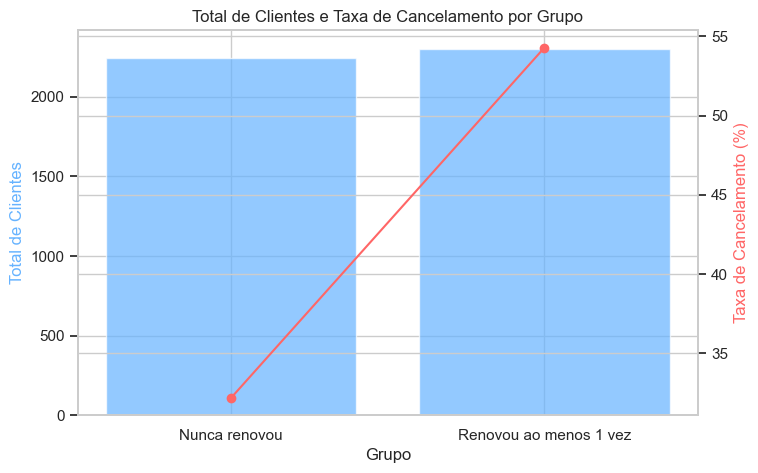

In [58]:
fig, ax1 = plt.subplots(figsize=(8,5))

# Barras para total de clientes
ax1.bar(df_renovou_volta_mais['grupo_cliente'], df_renovou_volta_mais['total_clientes'], color='#66b3ff', alpha=0.7)
ax1.set_ylabel('Total de Clientes', color='#66b3ff')
ax1.set_xlabel('Grupo')

# Linha para taxa de cancelamento
ax2 = ax1.twinx()
ax2.plot(df_renovou_volta_mais['grupo_cliente'], df_renovou_volta_mais['taxa_cancelamento_percentual'], color='#ff6666', marker='o')
ax2.set_ylabel('Taxa de Cancelamento (%)', color='#ff6666')

plt.title('Total de Clientes e Taxa de Cancelamento por Grupo')
plt.show()


1.3.6 Clientes que não renovaram por tipo de contrato

In [30]:
query_contrato_nao_renovou = """ 
WITH contratos_finalizados AS (
  SELECT 
    id_cliente,
    id_contrato,
    tipo_seguro,
    DATE(data_fim) AS data_fim
  FROM contratos
  WHERE DATE(data_fim) < DATE('now')
),

sem_renovacao AS (
  SELECT cf.*
  FROM contratos_finalizados cf
  LEFT JOIN contratos c2 
    ON cf.id_cliente = c2.id_cliente
    AND DATE(c2.data_inicio) > DATE(cf.data_fim)
  WHERE c2.id_contrato IS NULL  -- ou seja, não renovou
)

SELECT 
  tipo_seguro,
  COUNT(DISTINCT id_cliente) AS clientes_nao_renovaram
FROM sem_renovacao
GROUP BY tipo_seguro
ORDER BY clientes_nao_renovaram DESC;
"""
df_contrato_nao_renovou = pd.read_sql_query(query_contrato_nao_renovou, conn)
df_contrato_nao_renovou


,tipo_seguro,clientes_nao_renovaram
0,Auto,725
1,Vida,698
2,Empresarial,685
3,Residencial,677
4,Saúde,656


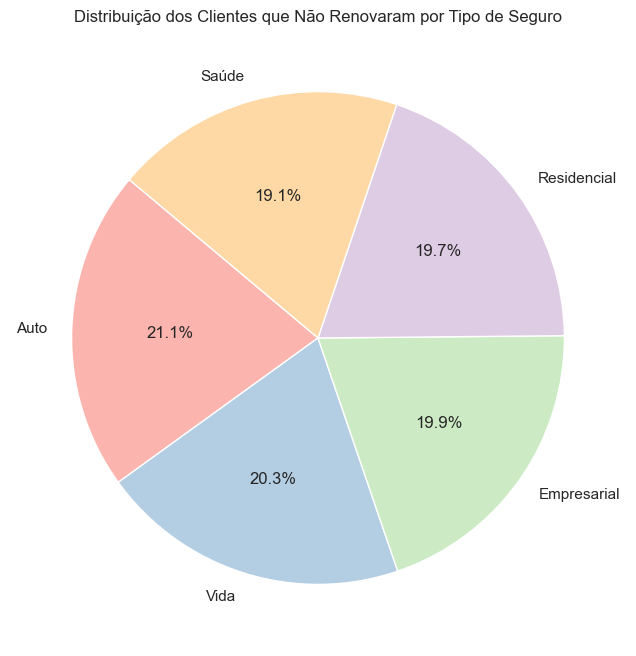

In [60]:
plt.figure(figsize=(8,8))
plt.pie(df_contrato_nao_renovou['clientes_nao_renovaram'], 
        labels=df_contrato_nao_renovou['tipo_seguro'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Pastel1.colors)
plt.title('Distribuição dos Clientes que Não Renovaram por Tipo de Seguro')
plt.show()


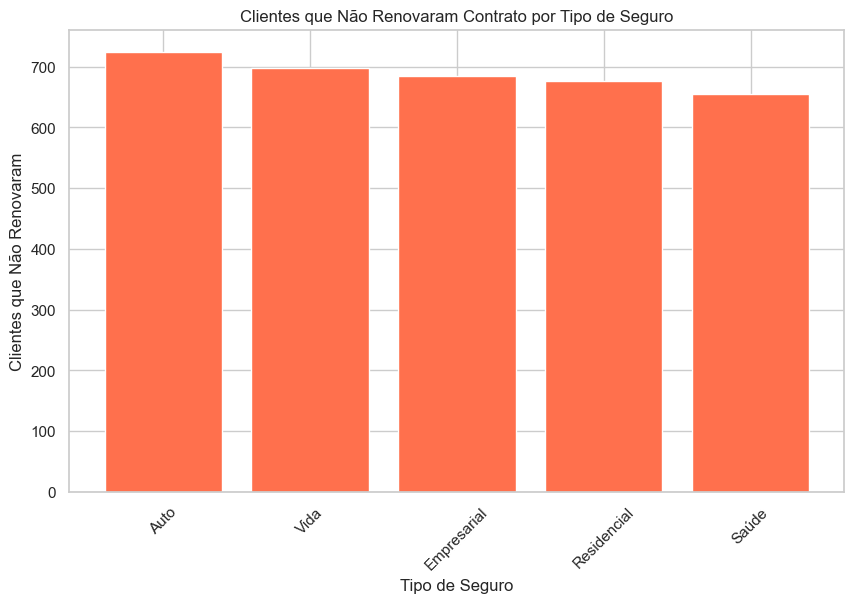

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_contrato_nao_renovou['tipo_seguro'], df_contrato_nao_renovou['clientes_nao_renovaram'], color='#ff704d')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Clientes que Não Renovaram')
plt.title('Clientes que Não Renovaram Contrato por Tipo de Seguro')
plt.xticks(rotation=45)
plt.show()


1.4 Motivo de cancelamento mais frequente

In [31]:
query_motivo_cancel_agroup = """ 
SELECT 
  motivo_cancelamento,
  COUNT(*) AS total_cancelamentos
FROM cancelamentos
GROUP BY motivo_cancelamento
ORDER BY total_cancelamentos DESC;
"""
df_motivo_calcel_agroup = pd.read_sql_query(query_motivo_cancel_agroup, conn)
df_motivo_calcel_agroup

,motivo_cancelamento,total_cancelamentos
0,Atendimento ruim,520
1,Mudança de seguradora,519
2,Preço alto,506
3,Problemas no sinistro,488
4,Cobertura insuficiente,487


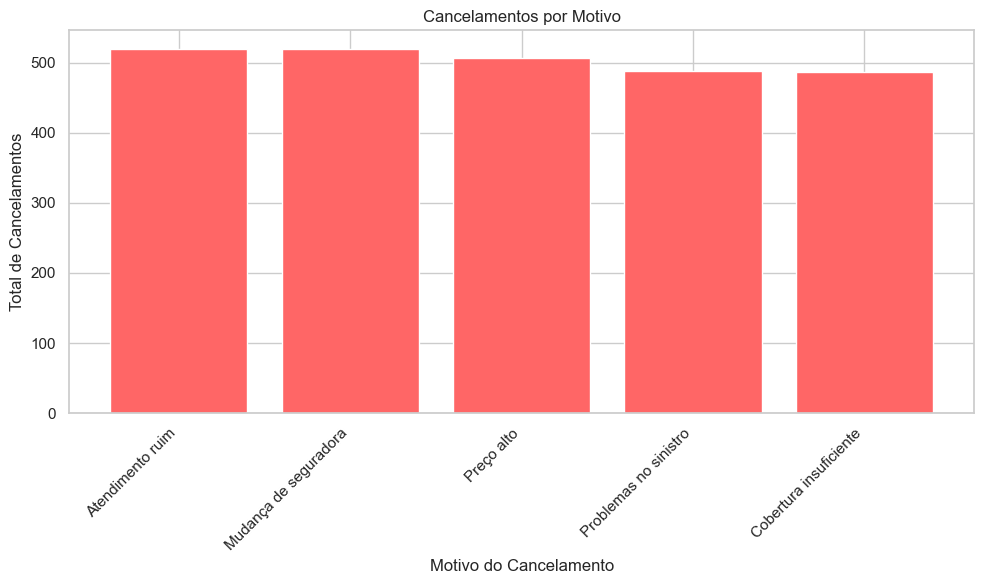

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_motivo_calcel_agroup['motivo_cancelamento'], df_motivo_calcel_agroup['total_cancelamentos'], color='#ff6666')
plt.xlabel('Motivo do Cancelamento')
plt.ylabel('Total de Cancelamentos')
plt.title('Cancelamentos por Motivo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


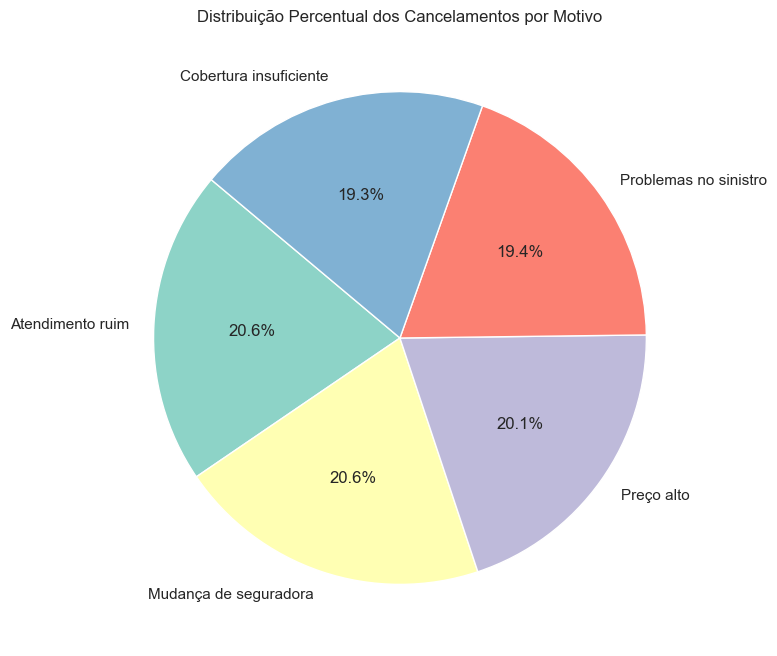

In [63]:
plt.figure(figsize=(8,8))
plt.pie(df_motivo_calcel_agroup['total_cancelamentos'], 
        labels=df_motivo_calcel_agroup['motivo_cancelamento'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Set3.colors)
plt.title('Distribuição Percentual dos Cancelamentos por Motivo')
plt.show()


1.4.1 Agrupamento por avaliação da experiência

Verificar se algum motivo de cancelamento está associado a avaliações mais positivas ou negativas.

In [33]:
query_motivo_cancel_av_exp_agroup = """ 
SELECT 
  motivo_cancelamento,
  avaliacao_experiencia_cancelamento,
  COUNT(*) AS total
FROM cancelamentos
GROUP BY motivo_cancelamento, avaliacao_experiencia_cancelamento
ORDER BY motivo_cancelamento, total DESC;
"""

df_motivo_cancel_av_exp_agroup = pd.read_sql_query(query_motivo_cancel_av_exp_agroup, conn)
df_motivo_cancel_av_exp_agroup

,motivo_cancelamento,avaliacao_experiencia_cancelamento,total
0,Atendimento ruim,Boa,187
1,Atendimento ruim,Neutra,171
2,Atendimento ruim,Ruim,162
3,Cobertura insuficiente,Boa,166
4,Cobertura insuficiente,Neutra,164
5,Cobertura insuficiente,Ruim,157
6,Mudança de seguradora,Boa,192
7,Mudança de seguradora,Ruim,167
8,Mudança de seguradora,Neutra,160
9,Preço alto,Ruim,170


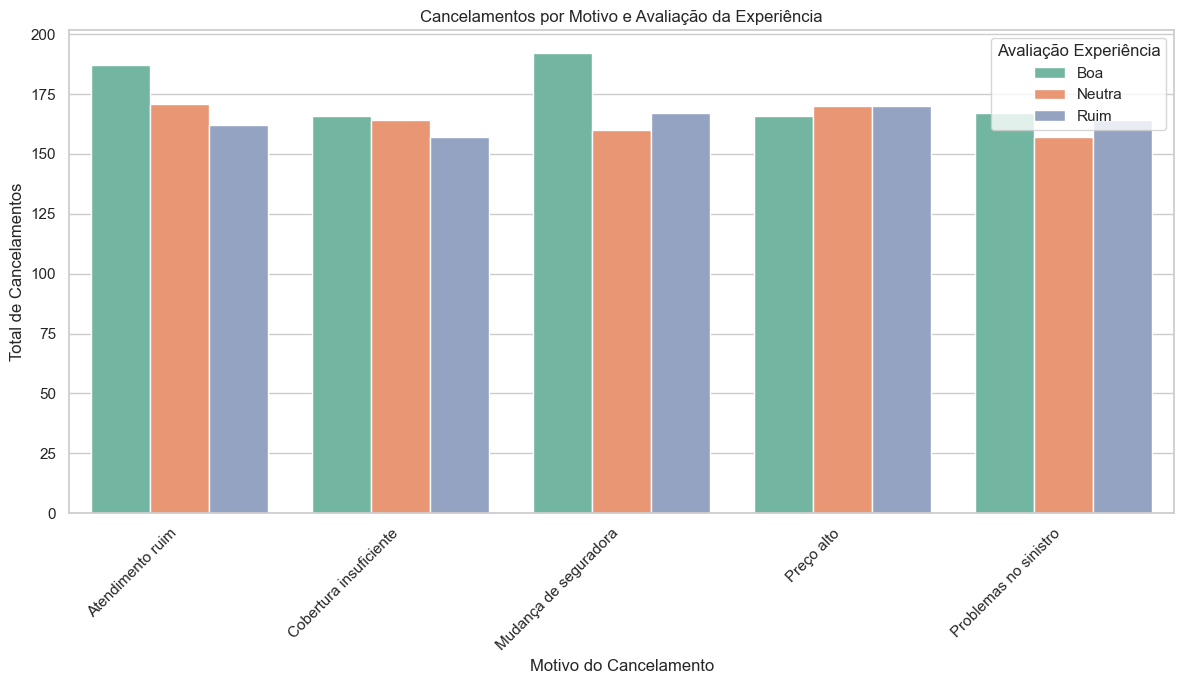

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.barplot(
    data=df_motivo_cancel_av_exp_agroup, 
    x='motivo_cancelamento', 
    y='total', 
    hue='avaliacao_experiencia_cancelamento',
    palette='Set2'
)
plt.xlabel('Motivo do Cancelamento')
plt.ylabel('Total de Cancelamentos')
plt.title('Cancelamentos por Motivo e Avaliação da Experiência')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Avaliação Experiência')
plt.tight_layout()
plt.show()


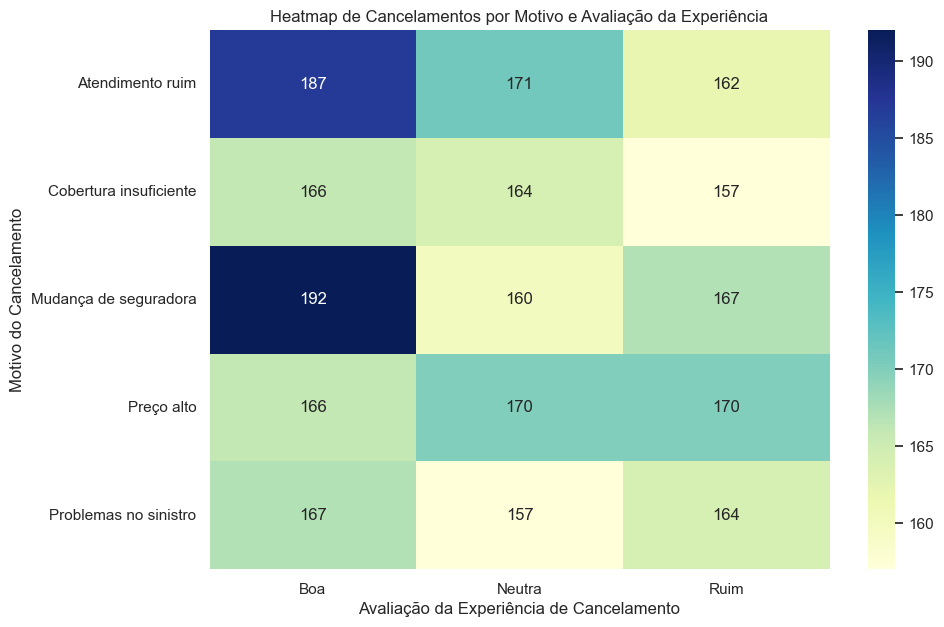

In [66]:
import pandas as pd
import numpy as np

# Pivot para matriz
pivot = df_motivo_cancel_av_exp_agroup.pivot(
    index='motivo_cancelamento', 
    columns='avaliacao_experiencia_cancelamento', 
    values='total'
).fillna(0)

plt.figure(figsize=(10,7))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap de Cancelamentos por Motivo e Avaliação da Experiência')
plt.ylabel('Motivo do Cancelamento')
plt.xlabel('Avaliação da Experiência de Cancelamento')
plt.show()


1.5 Cancelamentos por canal

In [36]:
query_cancel_por_canal = """ 
SELECT 
  canal_cancelamento,
  COUNT(*) AS total
FROM cancelamentos
GROUP BY canal_cancelamento
ORDER BY total DESC;
"""
df_cancel_por_canal = pd.read_sql_query(query_cancel_por_canal, conn)
df_cancel_por_canal


,canal_cancelamento,total
0,App,663
1,Telefone,647
2,Site,611
3,Agência,599


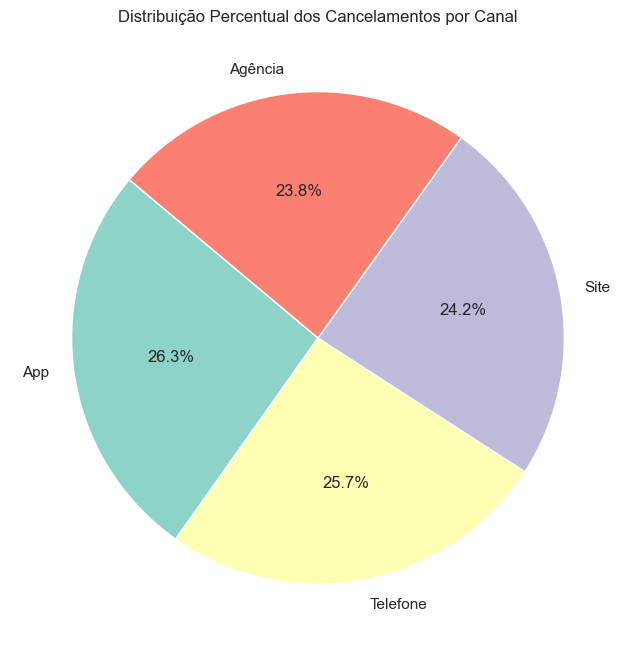

In [68]:
plt.figure(figsize=(8,8))
plt.pie(df_cancel_por_canal['total'], 
        labels=df_cancel_por_canal['canal_cancelamento'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Set3.colors)
plt.title('Distribuição Percentual dos Cancelamentos por Canal')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26600\4077921603.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Avaliação Experiência')


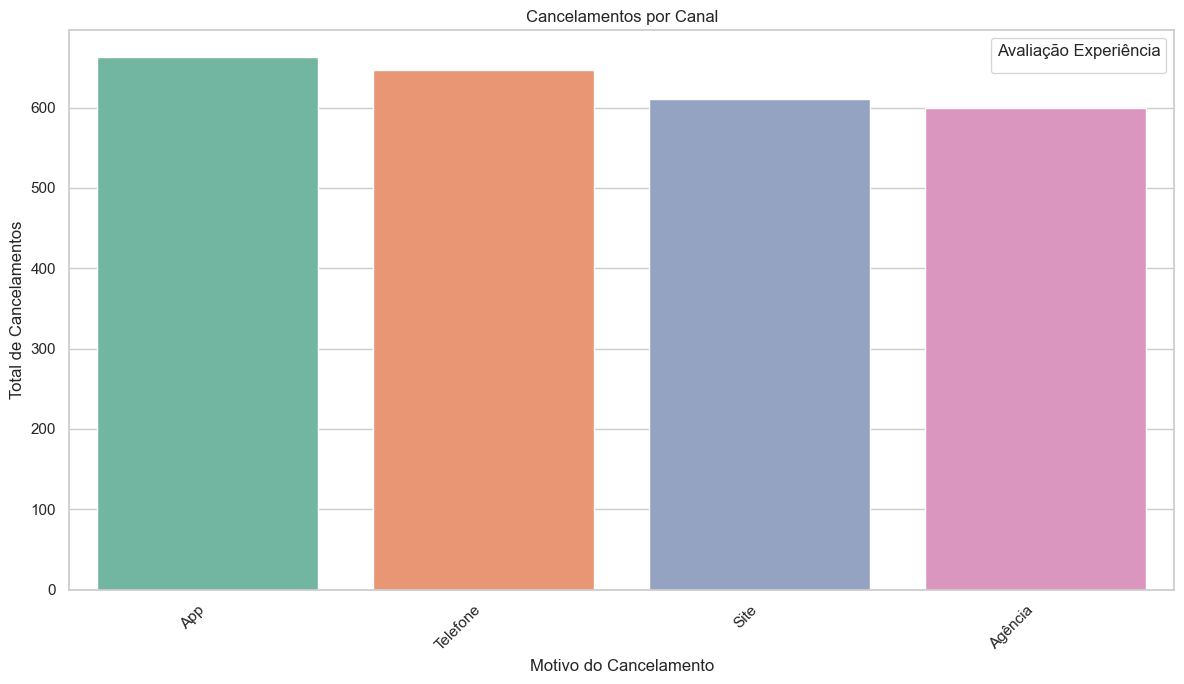

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.barplot(
    data=df_cancel_por_canal, 
    x='canal_cancelamento', 
    y='total', 
    hue='canal_cancelamento',
    palette='Set2'
)
plt.xlabel('Motivo do Cancelamento')
plt.ylabel('Total de Cancelamentos')
plt.title('Cancelamentos por Canal')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Avaliação Experiência')
plt.tight_layout()
plt.show()


1.5.1 Existe uma relação entre canal de cancelamento e avaliação da experiencia de cancelamento?

In [34]:
query_canal_versus_aval = """ 
SELECT 
  canal_cancelamento,
  avaliacao_experiencia_cancelamento,
  COUNT(*) AS total
FROM cancelamentos
GROUP BY canal_cancelamento, avaliacao_experiencia_cancelamento
ORDER BY canal_cancelamento, total DESC;
"""
df_canal_versus_aval = pd.read_sql_query(query_canal_versus_aval, conn)
df_canal_versus_aval

,canal_cancelamento,avaliacao_experiencia_cancelamento,total
0,Agência,Boa,206
1,Agência,Neutra,200
2,Agência,Ruim,193
3,App,Boa,235
4,App,Ruim,230
5,App,Neutra,198
6,Site,Boa,220
7,Site,Neutra,196
8,Site,Ruim,195
9,Telefone,Neutra,228


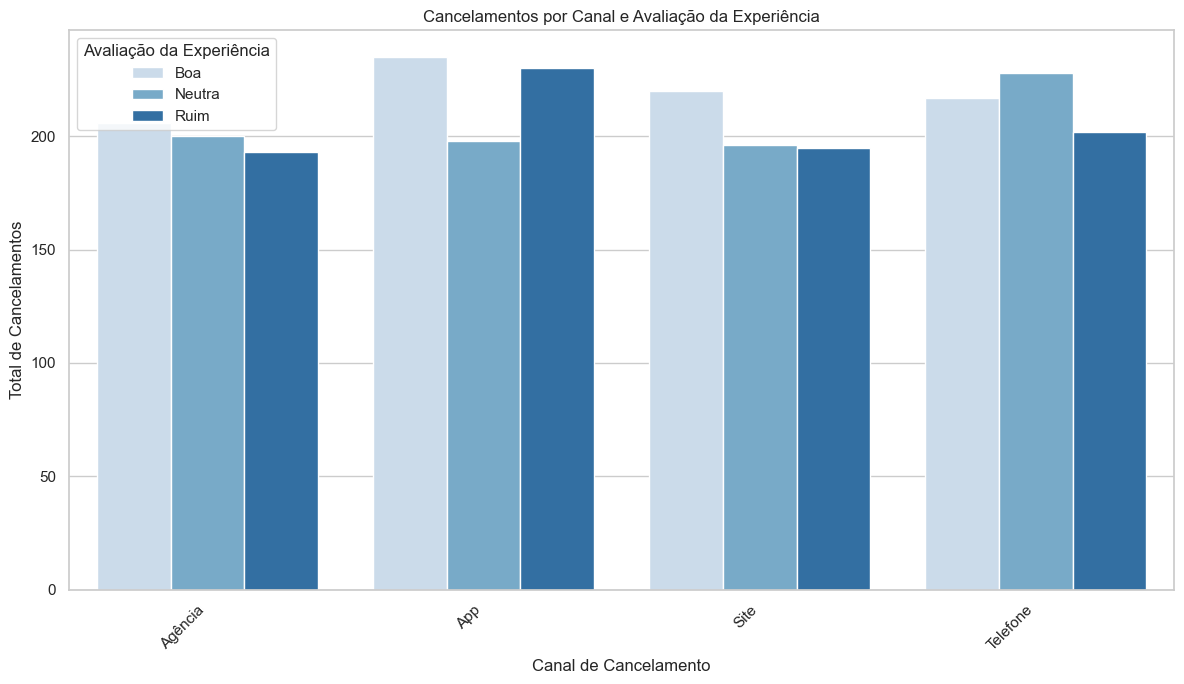

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.barplot(
    data=df_canal_versus_aval, 
    x='canal_cancelamento', 
    y='total', 
    hue='avaliacao_experiencia_cancelamento',
    palette='Blues'
)
plt.xlabel('Canal de Cancelamento')
plt.ylabel('Total de Cancelamentos')
plt.title('Cancelamentos por Canal e Avaliação da Experiência')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Avaliação da Experiência')
plt.tight_layout()
plt.show()


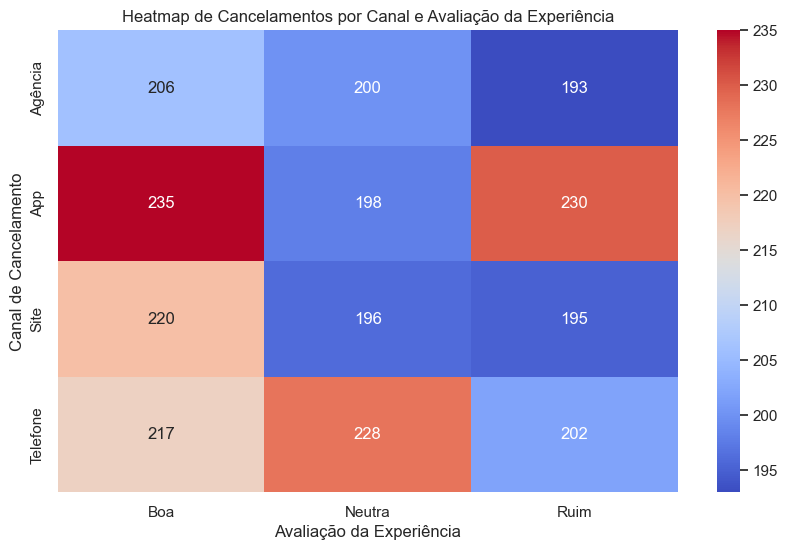

In [72]:
pivot = df_canal_versus_aval.pivot(
    index='canal_cancelamento', 
    columns='avaliacao_experiencia_cancelamento', 
    values='total'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap de Cancelamentos por Canal e Avaliação da Experiência')
plt.ylabel('Canal de Cancelamento')
plt.xlabel('Avaliação da Experiência')
plt.show()


1.6 Satisfação da última avaliação por tipo de contrato


In [37]:
query_satisf_ultima_avl_agroup_contrato = """ 
SELECT 
  tipo_seguro,
  satisfacao_ultima_avaliacao,
  COUNT(*) AS total
FROM contratos
GROUP BY tipo_seguro, satisfacao_ultima_avaliacao
ORDER BY tipo_seguro, total DESC;
"""
df_satisf_ultima_avl_agroup_contrato = pd.read_sql_query(query_satisf_ultima_avl_agroup_contrato, conn)
df_satisf_ultima_avl_agroup_contrato

,tipo_seguro,satisfacao_ultima_avaliacao,total
0,Auto,Média,862
1,Auto,Baixa,808
2,Auto,Alta,759
3,Empresarial,Baixa,855
4,Empresarial,Alta,790
5,Empresarial,Média,778
6,Residencial,Média,820
7,Residencial,Alta,775
8,Residencial,Baixa,757
9,Saúde,Média,803


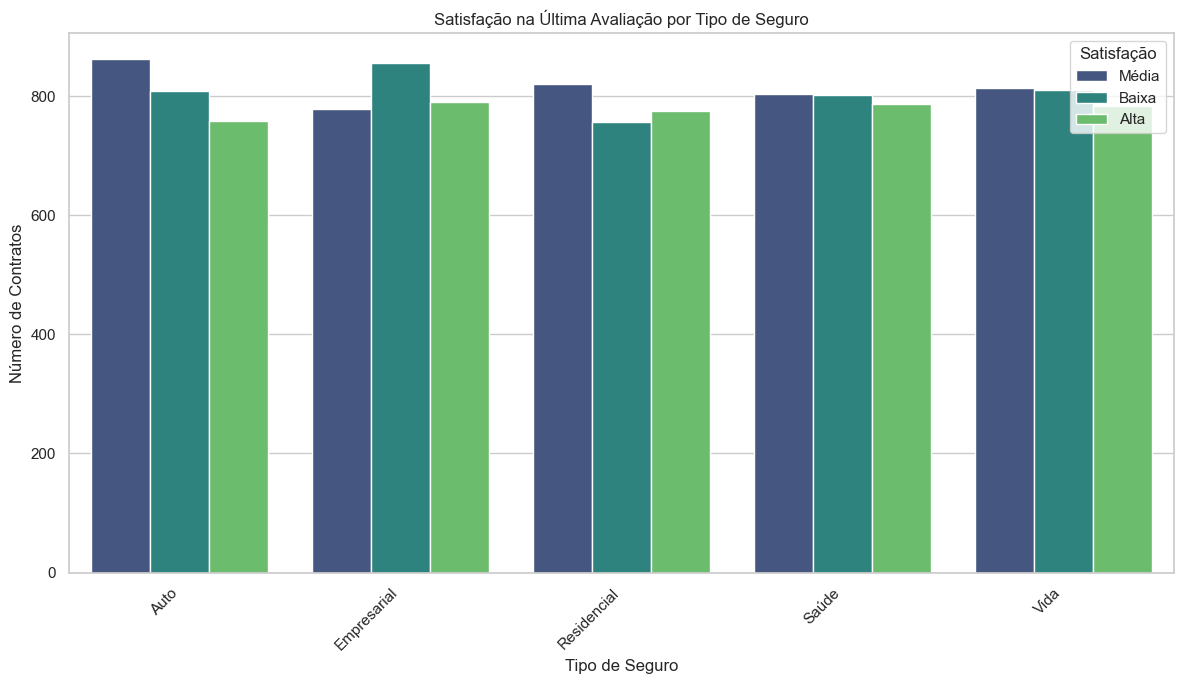

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.barplot(
    data=df_satisf_ultima_avl_agroup_contrato, 
    x='tipo_seguro', 
    y='total', 
    hue='satisfacao_ultima_avaliacao',
    palette='viridis'
)
plt.xlabel('Tipo de Seguro')
plt.ylabel('Número de Contratos')
plt.title('Satisfação na Última Avaliação por Tipo de Seguro')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfação')
plt.tight_layout()
plt.show()


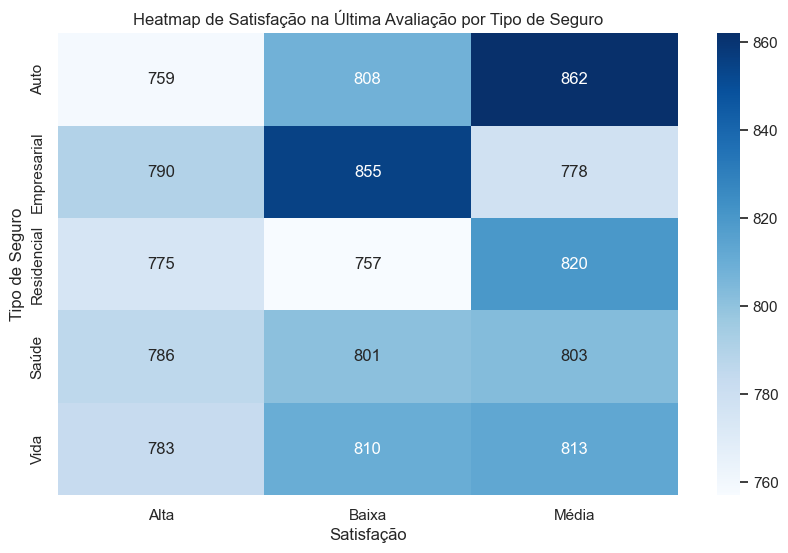

In [77]:
pivot = df_satisf_ultima_avl_agroup_contrato.pivot(
    index='tipo_seguro', 
    columns='satisfacao_ultima_avaliacao', 
    values='total'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap de Satisfação na Última Avaliação por Tipo de Seguro')
plt.ylabel('Tipo de Seguro')
plt.xlabel('Satisfação')
plt.show()


Total de contratos ativos

In [39]:
query_total_contratos_ativos = """
SELECT COUNT(*) AS total_contratos_ativos
FROM contratos c
LEFT JOIN cancelamentos ca ON c.id_contrato = ca.id_contrato
WHERE ca.id_contrato IS NULL  -- contrato não cancelado
  AND DATE('now') BETWEEN DATE(c.data_inicio) AND DATE(c.data_fim)
;

"""
df_total_contratos_ativos = pd.read_sql_query(query_total_contratos_ativos, conn)
df_total_contratos_ativos

,total_contratos_ativos
0,3660


In [6]:
query = """ 
SELECT 
  co.tipo_seguro,
  COUNT(*) AS total_contratos,
  SUM(CASE WHEN ca.id_contrato IS NOT NULL THEN 1 ELSE 0 END) AS total_cancelados,
  ROUND(
    SUM(CASE WHEN ca.id_contrato IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*),
    2
  ) AS churn_percent
FROM contratos co
LEFT JOIN cancelamentos ca ON ca.id_contrato = co.id_contrato
GROUP BY co.tipo_seguro
ORDER BY churn_percent DESC;
"""
df_query = pd.read_sql_query(query, conn)
df_query

,tipo_seguro,total_contratos,total_cancelados,churn_percent
0,Saúde,2390,528,22.09
1,Residencial,2352,512,21.77
2,Empresarial,2423,522,21.54
3,Vida,2406,489,20.32
4,Auto,2429,469,19.31


In [3]:
query_total_clientes_ativos = """
SELECT COUNT(DISTINCT c.id_cliente) AS total_clientes_ativos
FROM contratos c
LEFT JOIN cancelamentos ca ON c.id_contrato = ca.id_contrato
WHERE ca.id_contrato IS NULL
  AND DATE('now') BETWEEN DATE(c.data_inicio) AND DATE(c.data_fim);
"""

df_total_clientes_ativos = pd.read_sql_query(query_total_clientes_ativos, conn)
df_total_clientes_ativos


,total_clientes_ativos
0,2562
